In [5]:

import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random
from qiskit.visualization import plot_histogram

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 4.6/4.6 MB 17.2 kB/s eta 0:00:00
  Using cached qiskit_aer-0.11.2-cp310-cp310-win_amd64.whl (9.6 MB)
  Using cached qiskit_ibmq_provider-0.20.0-py3-none-any.whl (241 kB)
  Using cached websockets-10.4-cp310-cp310-win_amd64.whl (101 kB)
  Using cached requests_ntlm-1.2.0-py3-none-any.whl (6.0 kB)
  Using cached stevedore-5.0.0-py3-none-any.whl (49 kB)
  Using cached dill-0.3.6-py3-none-any.whl (110 kB)
  Using cached pyspnego-0.8.0-cp310-cp310-win_amd64.whl (241 kB)
  Using cached pbr-5.11.1-py2.py3-none-any.whl (112 kB)
  Created wheel for qiskit: filename=qiskit-0.41.0-py3-none-any.whl size=12827 sha256=0d36949ce1b51698b7c7f087875785f3262930aa55661c69dbf9a1507dc05d01
  Stored in directory: c:\users\supratim sengupta\appdata\local\pip\cache\wheels\39\0b\4e\0efd59faeb29fb50101efd0fc6a248ca89a419c6ecde850018
Successfully built qiskit


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\envs\\tf\\Lib\\site-packages\\qiskit\\_accelerate.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install qiskit


  Using cached qiskit-0.41.0.tar.gz (14 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 4.6/4.6 MB 151.9 kB/s eta 0:00:00
     ---------------------------------------- 9.6/9.6 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 241.3/241.3 kB 3.7 MB/s eta 0:00:00
     ------------------------------------ 101.4/101.4 kB 530.2 kB/s eta 0:00:00
     -------------------------------------- 110.5/110.5 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 49.6/49.6 kB 1.2 MB/s eta 0:00:00
     ------------------------------------ 241.4/241.4 kB 869.0 kB/s eta 0:00:00
     -------------------------------------- 112.7/112.7 kB 1.3 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.41.0-py3-none-any.whl size=12827 sha256=2fbde25638867638693aef92e4b4d92b1c404a28e1120d7815eb8ce23bd7a3bf
  Stored in directory: c:\users\supratim sengupta\appdata\local\p


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import torch
from torch.nn.functional import relu

from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#pip install scikit-learn

import pennylane as qml
from pennylane.templates import AngleEmbedding, StronglyEntanglingLayers
from pennylane.operation import Tensor

import matplotlib.pyplot as plt

np.random.seed(42)

In [7]:
!pip install scikit-learn

     ---------------------------------------- 8.3/8.3 MB 19.4 kB/s eta 0:00:00
     ------------------------------------- 298.0/298.0 kB 15.8 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
X, y = load_iris(return_X_y=True)

# pick inputs and labels from the first two classes only,
# corresponding to the first 100 samples
X = X[:100] #0: 0-49, 1:50-99, 2:100-149
y = y[:100]

# scaling the inputs is important since the embedding we use is periodic
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# scaling the labels to -1, 1 is important for the SVM and the
# definition of a hinge loss
y_scaled = 2 * (y - 0.5)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

In [10]:
n_qubits = len(X_train[0])
print(X_train[0])
n_qubits

[ 0.35866332  2.73124718 -0.94364311 -0.68644165]


4

In [11]:
dev_kernel = qml.device("default.qubit", wires=n_qubits)

projector = np.zeros((2**n_qubits, 2**n_qubits))
projector[0, 0] = 1 #M observable from our lecture

@qml.qnode(dev_kernel)
def kernel(x1, x2):
    """The quantum kernel."""
    AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

In [12]:
kernel(X_train[0], X_train[0])

tensor(1., requires_grad=True)

In [13]:
def kernel_matrix(A, B):
    """Compute the matrix whose entries are the kernel
       evaluated on pairwise data from sets A and B."""
    return np.array([[kernel(a, b) for b in B] for a in A])

In [14]:
svm = SVC(kernel=kernel_matrix).fit(X_train, y_train)

In [15]:
predictionsTrain = svm.predict(X_train) #SVM that we trained, will predict result from X_train
accuracy_score(predictionsTrain, y_train) #Compare SVM prediction with ACTUAL result, y_train

1.0

In [16]:
predictions = svm.predict(X_test) #Data SVM did not see, SVM will make prediction
accuracy_score(predictions, y_test) #Result from New Prediction from ACTUAL result, y_train

1.0

In [17]:
 import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer, AdagradOptimizer, GradientDescentOptimizer, AdamOptimizer, MomentumOptimizer
from pennylane.templates import AmplitudeEmbedding, AngleEmbedding
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [18]:
X, Y = load_iris(return_X_y=True)

#Only First Hundred to Differentiate b/w 2 classes [0, 1], 100+ = more classes
X = X[:100]
Y = Y[:100]

#Split and view data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X[0], Y[0])

[5.1 3.5 1.4 0.2] 0


In [19]:
def drawData(i, j):
    plt.scatter(X[:, i][Y == 1], X[:, j][Y == 1], c="b", marker="o", edgecolors="k")
    plt.scatter(X[:, i][Y == 0], X[:, j][Y == 0], c="r", marker="o", edgecolors="k")
    plt.title("Original data: Property " + str(i+1) + " w/ Property " + str(j+1))

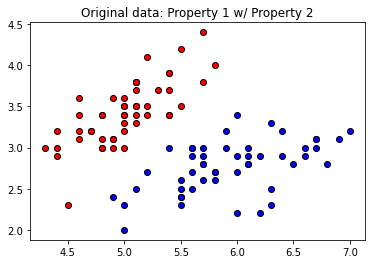

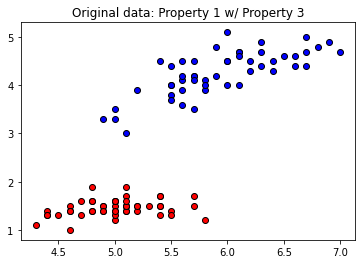

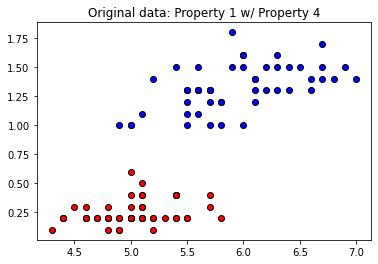

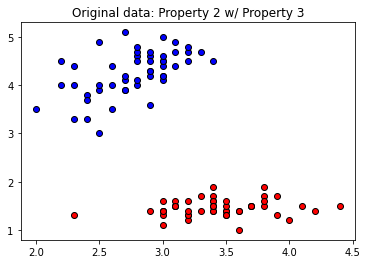

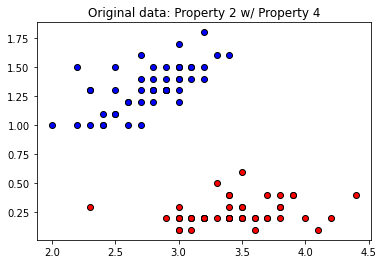

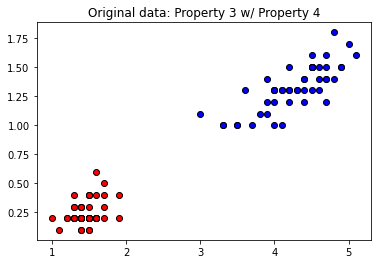

In [20]:
for i in range(3):
    for j in range(i+1, 4):
        plt.figure()
        drawData(i, j)
        plt.show()

In [21]:
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

In [22]:
#Variational Ansatz
def layer(W):
    qml.adjoint(qml.QFT)(wires=[0, 1])
    qml.Rot(W[0, 0], W[0, 1], W[0, 2], wires=0)
    qml.Rot(W[1, 0], W[1, 1], W[1, 2], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.QFT(wires=[0, 1])

In [23]:
@qml.qnode(dev)
def circuit(weights, params):
    #Try Angle Embedding w/ 4 Qubits
    AmplitudeEmbedding(params, wires=range(n_qubits), normalize=True)
    for W in weights:
        layer(W)
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

In [24]:
num_layers = 2 #more layers = more malleable to diverse/exotic data classification
var_init = (0.01 * np.random.randn(num_layers, n_qubits, 3), 0.0)
circuit(var_init[0], X[0]) #0 or 1

tensor(0.29520923, requires_grad=True)

In [25]:
print("x        : ", X[0])
print("angles   : ", AmplitudeEmbedding(X[0], wires=range(n_qubits), normalize=True))
print("amp. vect: ", np.real(dev.state))

x        :  [5.1 3.5 1.4 0.2]
angles   :  AmplitudeEmbedding(array([0.80377277+0.j, 0.55160877+0.j, 0.22064351+0.j, 0.0315205 +0.j]), wires=[0, 1])
amp. vect:  [0.80380637 0.55181598 0.21882457 0.03831436]


In [26]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2
    loss = loss / len(labels)
    return loss

def accuracy(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        if abs(l - p) < 1e-5:
            loss = loss + 1
    loss = loss / len(labels)
    return loss

In [27]:
def variational_classifier(var, params):
    weights = var[0]
    bias = var[1]
    return circuit(weights, params) + bias


def cost(weights, features, labels):
    predictions = [variational_classifier(weights, f) for f in features]
    return square_loss(labels, predictions)

In [28]:
np.random.seed(71)
num_layers = 12
var_init = (0.01 * np.random.randn(num_layers, n_qubits, 3), 0.0)

In [29]:
opt = NesterovMomentumOptimizer(0.01) #Parameter Shift Rule, Gradient Descent
batch_size = 5

def signer(inp, threshold):
    if inp >= 0.5 + threshold:
        return 1
    elif inp < 0.5 - threshold:
        return 0
    else:
        return 0.5
def predictor(f, threshold):
    return signer(float(variational_classifier(var, f)), threshold)



var = var_init
threshold = 0
def displayTest(current):
    print("")
    for i in range(10):
        threshold = i*0.05
        predictions_train = [predictor(f, threshold) for f in X_train]
        # Compute accuracy on train set
        acc_train = accuracy(Y_train, predictions_train)
        print(current + ": | Acc train: {:0.7f} | Threshold {:0.5f}" "".format(acc_train, threshold))
    print("")
displayTest("Start")

# train the variational classifier
for it in range(101):
    #Batch Training
    # Update the weights by one optimizer step
    batch_index = np.random.randint(0, len(X_train), (batch_size,))
    X_train_batch = X_train[batch_index]
    Y_train_batch = Y_train[batch_index]
    var = opt.step(lambda v: cost(v, X_train_batch, Y_train_batch), var)

    
    if ((it + 1) % 5 == 0 or it == 0):
        # Compute predictions on train set
        predictions_train = [predictor(f, threshold) for f in X_train]
        # Compute accuracy on train set
        acc_train = accuracy(Y_train, predictions_train)
        theacc = cost(var, X_train_batch, Y_train_batch)
        print("Iter: {:5d} | Cost: {:0.5f} | Acc train: {:0.7f} | Threshold {:0.5f}" "".format(it + 1, theacc*10, acc_train, threshold))
        if (acc_train > 0.70):
            if (threshold < 0.3):
                threshold += 0.05
            else:
                threshold += 0.01
            
displayTest("Results")
        


Start: | Acc train: 0.5333333 | Threshold 0.00000
Start: | Acc train: 0.5200000 | Threshold 0.05000
Start: | Acc train: 0.5200000 | Threshold 0.10000
Start: | Acc train: 0.5200000 | Threshold 0.15000
Start: | Acc train: 0.4000000 | Threshold 0.20000
Start: | Acc train: 0.2266667 | Threshold 0.25000
Start: | Acc train: 0.1066667 | Threshold 0.30000
Start: | Acc train: 0.0133333 | Threshold 0.35000
Start: | Acc train: 0.0000000 | Threshold 0.40000
Start: | Acc train: 0.0000000 | Threshold 0.45000



C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\pennylane\_grad.py:107: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


Iter:     1 | Cost: 5.73969 | Acc train: 0.5333333 | Threshold 0.00000
Iter:     5 | Cost: 1.79908 | Acc train: 0.5333333 | Threshold 0.00000
Iter:    10 | Cost: 0.45021 | Acc train: 0.5333333 | Threshold 0.00000
Iter:    15 | Cost: 5.35315 | Acc train: 0.5333333 | Threshold 0.00000
Iter:    20 | Cost: 4.55661 | Acc train: 0.5333333 | Threshold 0.00000
Iter:    25 | Cost: 1.57557 | Acc train: 0.5333333 | Threshold 0.00000
Iter:    30 | Cost: 5.17116 | Acc train: 0.5333333 | Threshold 0.00000
Iter:    35 | Cost: 3.13808 | Acc train: 0.5333333 | Threshold 0.00000
Iter:    40 | Cost: 0.68769 | Acc train: 0.5333333 | Threshold 0.00000
Iter:    45 | Cost: 3.33718 | Acc train: 0.5333333 | Threshold 0.00000
Iter:    50 | Cost: 3.11854 | Acc train: 0.5333333 | Threshold 0.00000
Iter:    55 | Cost: 1.68892 | Acc train: 0.5333333 | Threshold 0.00000
Iter:    60 | Cost: 3.47720 | Acc train: 0.5333333 | Threshold 0.00000
Iter:    65 | Cost: 5.49398 | Acc train: 0.5333333 | Threshold 0.00000
Iter: 

In [30]:
#Number of Errors & Compare VQC to Actual
for i in range(len(X)):
    #if (predictor(X[i], 0.2) - Y[i] != 0):
    #    print(i)
    #print(signer(float(variational_classifier(var, X[i])), 0.25), "\t", Y[i])
    #print(float(variational_classifier(var, X[i]))*100, "\t", Y[i])
    pass

In [31]:
def plotter(i, j, threshold):
    plt.figure()
    cm = plt.cm.RdBu
    thecomputationTrain = np.array([predictor(i, threshold) for i in X_train])
    thecomputationTest = np.array([predictor(i, threshold) for i in X_test])
    # plot data
    #Train Data - Certain Data
    plt.scatter(
        X_train[:, i][thecomputationTrain == 1],X_train[:, j][thecomputationTrain == 1],
        c="b",marker="o",edgecolors="k",label="class 1 train",
    )
    plt.scatter(
        X_train[:, i][thecomputationTrain == 0],X_train[:, j][thecomputationTrain == 0],
        c="r",marker="o",edgecolors="k",label="class 0 train",
    )
    #Train Data - Uncertain Data
    plt.scatter(
        X_train[:, i][thecomputationTrain == 0.5],X_train[:, j][thecomputationTrain == 0.5],
        c="y",marker="o",edgecolors="k",label="class ? train",
    )
    
    #Test Data - Certain Data
    plt.scatter(
        X_test[:, i][thecomputationTest == 1],X_test[:, j][thecomputationTest == 1],
        c="b",marker="^",edgecolors="k",label="class 1 test",
    )
    plt.scatter(
        X_test[:, i][thecomputationTest == 0],X_test[:, j][thecomputationTest == 0],
        c="r",marker="^",edgecolors="k",label="class 0 test",
    )
    #Test Data - Uncertain Data
    plt.scatter(
        X_test[:, i][thecomputationTest == 0.5],X_test[:, j][thecomputationTest == 0.5],
        c="y",marker="^",edgecolors="k",label="class ? test",
    )
    
    plt.legend()
    return plt

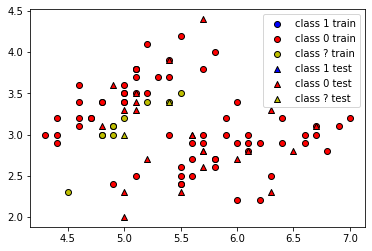

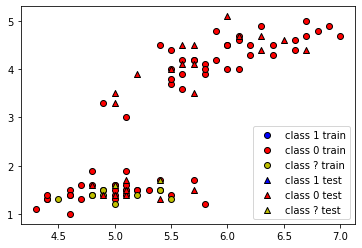

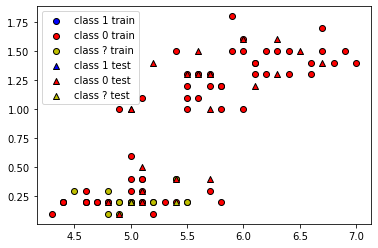

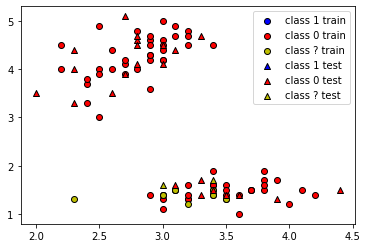

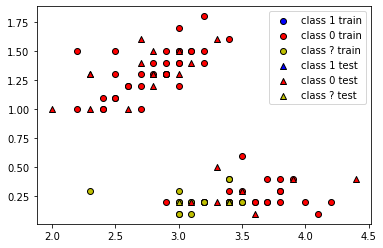

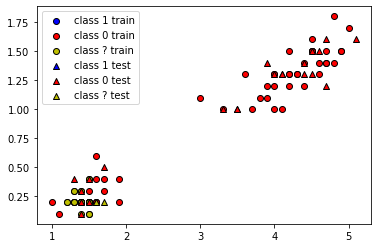

In [32]:
for i in range(3):
    for j in range(i+1, 4):
        plotter(i, j, 0.2) #x < 25 -> 0        x > 75 -> 1
        #plotter(i, j, 0.35) #x < 15 -> 0        x > 85 -> 1
        plt.show()

In [33]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import AmplitudeEmbedding, AngleEmbedding
import matplotlib.pyplot as plt
import random

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


import warnings
warnings.filterwarnings('ignore')

In [34]:
X, Y = load_iris(return_X_y=True)

#Split and view data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X[0], Y[0])

[5.1 3.5 1.4 0.2] 0


In [37]:
X, y = load_iris(return_X_y=True)

#Split and view data
X_train, X_test, Y_train, Y_test = train_test_split(X, y)


estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]


def addLabels():
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(float), edgecolor='k', s=100)

    addLabels()
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k', s=100)

addLabels()
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [38]:
randPoint = [random.randint(0, 2500)/1000, random.randint(5000, 7000)/1000, random.randint(1000, 6000)/1000]

fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
means = []
for name, label in [('Setosa', 0),('Versicolour', 1),('Virginica', 2)]:
    means.append([X[Y == label, 3].mean(), X[Y == label, 0].mean(),X[Y == label, 2].mean()])
    ax.scatter(*means[-1],edgecolor='k', s=100)
    ax.text3D(X[y == label, 3].mean(),X[y == label, 0].mean(),
              X[y == label, 2].mean()+0.25, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
ax.scatter(*randPoint, edgecolor='k', s=250)
addLabels()

<Figure size 288x216 with 0 Axes>

In [39]:
"""
1. Embed New Point into Qubits
2. Embed a Mean Point into Qubits
3. Classify New Point based on results

Hint 1: Multiple CSWAP's, 1 ancilla
Hint 2: Which result represents closeness?
"""

n_qubits = 7 #can be more or less
dev = qml.device("default.qubit", wires=n_qubits)
@qml.qnode(dev)
def SwapTest(params):
    #Quantum Embedding
    pass
    return qml.expval(qml.PauliZ(0))
results = []
classes = ['Setosa','Versicolour','Virginica']
for i in range(len(means)):
    params = [means[i], randPoint]
    results.append(SwapTest(params))

#Print Data
locus = 0#results.index(max(results))


"""
 -Answer Below (NO CHEATING!)- 
"""

'\n -Answer Below (NO CHEATING!)- \n'

In [40]:
"""
1. Embed New Point into Qubits
2. Embed a Mean Point into Qubits
3. Classify New Point based on results

Hint 1: Multiple CSWAP's
Hint 2: Which result represents closeness?
"""
n_qubits = 7
dev = qml.device("default.qubit", wires=n_qubits)
@qml.qnode(dev)
def SwapTest(params):
    qml.Hadamard(wires=0)
    AngleEmbedding(params[0], wires=[1, 2, 3])
    AngleEmbedding(params[1], wires=[4, 5, 6])
    qml.CSWAP(wires=[0, 1, 4])
    qml.CSWAP(wires=[0, 2, 5])
    qml.CSWAP(wires=[0, 3, 6])
    qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0))
results = []
classes = ['Setosa','Versicolour','Virginica']
for i in range(len(means)):
    params = [means[i], randPoint]
    results.append( SwapTest(params))

#Print Data
locus = results.index(max(results))
print("Random Point: " + str(randPoint))
for i in range(len(results)):
    print("Result " + str(i) + ": " + str(results[i]))
for i in range(len(means)):
    dist = sum((p-q)**2 for p, q in zip(means[i], randPoint)) ** .5
    print("Actual Distance: " + str(i) + ": " + str(dist) + " | " + str(means[i]))
print("This point is classified in class " + str(locus) + " which corresponds to " + classes[locus])



Random Point: [0.095, 6.344, 1.915]
Result 0: 0.5809925791672532
Result 1: 0.09616573327159528
Result 2: 0.019174211942670216
Actual Distance: 0: 1.4206526669105297 | [0.24599999999999997, 5.006, 1.4620000000000002]
Actual Distance: 1: 2.6797108052922423 | [1.3259999999999998, 5.936, 4.26]
Actual Distance: 2: 4.125053454199109 | [2.0260000000000002, 6.587999999999998, 5.5520000000000005]
This point is classified in class 0 which corresponds to Setosa


In [2]:
!pip install PennyLane --upgrade


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install --upgrade pip

  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\ProgramData\Anaconda3\envs\tf\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import PennyLane as qml

ModuleNotFoundError: No module named 'PennyLane'

In [4]:
from tensorflow import keras

In [5]:
import numpy as np

In [6]:
from pennylane.templates import AmplitudeEmbedding, AngleEmbedding, RandomLayers

ModuleNotFoundError: No module named 'pennylane'